<a href="https://colab.research.google.com/github/kumarrah2002/Fractal_Generator_GPU/blob/main/generator/mandelbrotGIF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



## **Import Dependencies**

In [8]:
from matplotlib import pyplot as plt
import numpy as np
from timeit import default_timer as timer
import os
import imageio



## **Now, we will create a Mandelbrot Fractal GIF!**

In [18]:
class mandelbrot:
  def __init__(self, cmap):
    self.cmap = cmap

  '''
  Args:
    cmap (str): color map of Mandelbrot Fractal
  '''

  def f(self, z, c):
    return z**(self.k) + c

  '''
  ------------------------------------------------------------------------------
  Args:
    z (float): critical point in complex plane
    c (float): complex number to change z
  ------------------------------------------------------------------------------
  '''

  def diverge(self, c, z = 0, iterations = 20):
    c = complex(*c)
    z = 0
    for i in range(iterations):
      if(z.real*z.real + z.imag*z.imag) >= 4:
        return i
      z = self.f(z, c)
    return 0

  '''
  ------------------------------------------------------------------------------
  Args:
    z (float): critical point in complex plane
    c (float): complex number
    iterations (int): Number of repetitions 
  ------------------------------------------------------------------------------
  '''

  def plot(self, k, complex_plane):
    self.k = k
    xmin, xmax, ymin, ymax = complex_plane
    resolution = 200 #200 points between minimum and maximum

    xx, yy = np.meshgrid(np.linspace(xmin, xmax, resolution), 
                        np.linspace(ymin, ymax, resolution))
    points = np.c_[xx.ravel(), yy.ravel()]
    mandelbrot_points = [self.diverge(c) for c in points]
    mandelbrot_points = np.array(mandelbrot_points).reshape(200, 200)
    plt.contourf(mandelbrot_points, cmap = self.cmap)

  '''
  ------------------------------------------------------------------------------
  Args:
    k (float): power of z --> used to create varying fractal shapes
    complex_plane (tuple): starting and ending values on the complex plane
      format: (xmin, xmax, ymin, ymax)
  ------------------------------------------------------------------------------
  '''

  def gif(self, lower, upper, iterations, complex_plane = (-2, 1, -1, 1)):
    if (lower >= 2):
      os.mkdir("mandelbrot_plots")
      series = np.linspace(lower, upper, iterations)
      for n in series:
        self.plot(n, complex_plane)
        plt.savefig(f"mandelbrot_plots/mandelbrot_{n}.jpg")
    
      gif = [] 
      files = [f"mandelbrot_plots/mandelbrot_{n}.jpg" for n in series]
      for image in files:
        gif.append(imageio.imread(image))
      imageio.mimsave('mandelbrot.gif', gif)
    
    else:
      print("Input a higher lower boundary")

  '''
  ------------------------------------------------------------------------------
  Args:
    lower (float): lowest value of k for the equation z**k + c
    upper (float): highest value of k for the equation z**k + c
    iterations (int): Number of repetitions 
  ------------------------------------------------------------------------------
  '''

Mandelbrot created in 0.214866 sec.


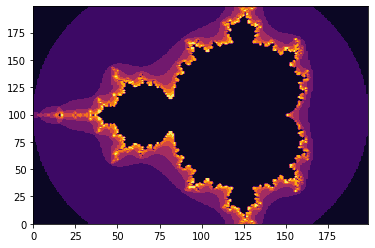

In [31]:
coordinates = (-2, 1, -1, 1)

start = timer()

mandelbrot_set = mandelbrot("inferno")
mandelbrot_set.plot(k = 2, complex_plane = coordinates)
end = timer() - start
print("Mandelbrot created in %f sec." % end)

**You can choose whatever shader you want for the fractal!**

All the colormaps can be found using this link: https://matplotlib.org/stable/tutorials/colors/colormaps.html

**To change the color, simply replace the string inside the mandelbrot() object to any of the available choices**

Mandelbrot GIF created in 127.837059 sec.


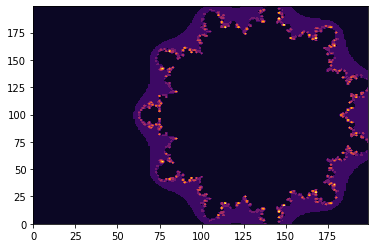

In [35]:
lower = 2
upper = 12
max_iter = 100

start = timer()

mandelbrot_set.gif(lower, upper, max_iter)

end = timer() - start
print("Mandelbrot GIF created in %f sec." % end)


In [34]:
import shutil

if (os.path.exists("/content/mandelbrot_plots") == True):
  shutil.rmtree("/content/mandelbrot_plots")
elif (os.path.exists("/content/mandelbrot.gif") == True):
  os.remove("mandelbrot.gif")


# To remove the mandelbrot fractal images and create another GIF, uncomment and run the code above

**Open mandelbrot.gif in your current directory and look at your stunning Mandelbrot Fractal GIF!**